In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("LoanApprovalPrediction.csv")

In [181]:
# Display random 10 sample records
data.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
434,LP002422,Male,No,1.0,Graduate,No,37719,0.0,152.0,360.0,1.0,Semiurban,Y
32,LP001098,Male,Yes,0.0,Graduate,No,3500,1667.0,114.0,360.0,1.0,Semiurban,Y
367,LP002211,Male,Yes,0.0,Graduate,No,4817,923.0,120.0,180.0,1.0,Urban,Y
120,LP001431,Female,No,0.0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
236,LP001806,Male,No,0.0,Graduate,No,2965,5701.0,155.0,60.0,1.0,Urban,Y
478,LP002560,Male,No,0.0,Not Graduate,No,2699,2785.0,96.0,360.0,NaN,Semiurban,Y
156,LP001552,Male,Yes,0.0,Graduate,No,4583,5625.0,255.0,360.0,1.0,Semiurban,Y
116,LP001421,Male,Yes,0.0,Graduate,No,5568,2142.0,175.0,360.0,1.0,Rural,N
169,LP001594,Male,Yes,0.0,Graduate,No,5708,5625.0,187.0,360.0,1.0,Semiurban,Y
117,LP001422,Female,No,0.0,Graduate,No,10408,0.0,259.0,360.0,1.0,Urban,Y


In [182]:
# Check for categorical variables
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


In [183]:
# Dropping Loan_ID column
data.drop(['Loan_ID'],axis=1,inplace=True)

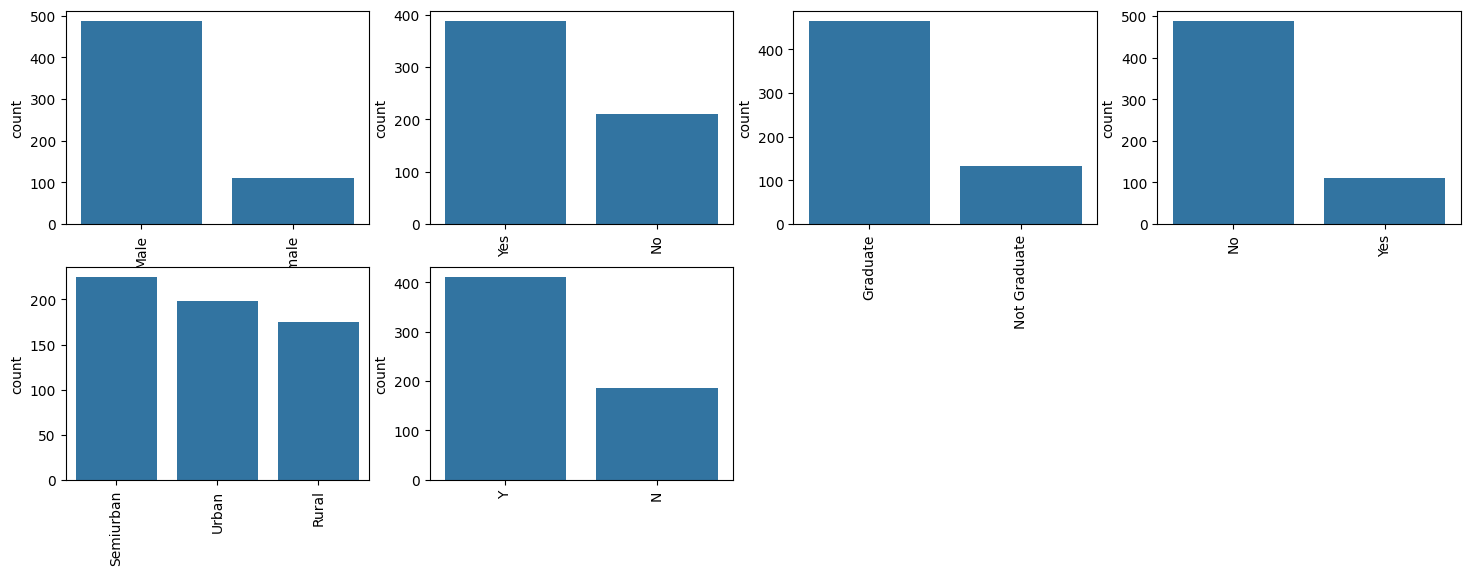

In [184]:
# Visualizing categorical variables
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

### Label Encoder

In [185]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how 
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])

In [186]:
# To find the number of columns with 
# datatype==object
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<Axes: >

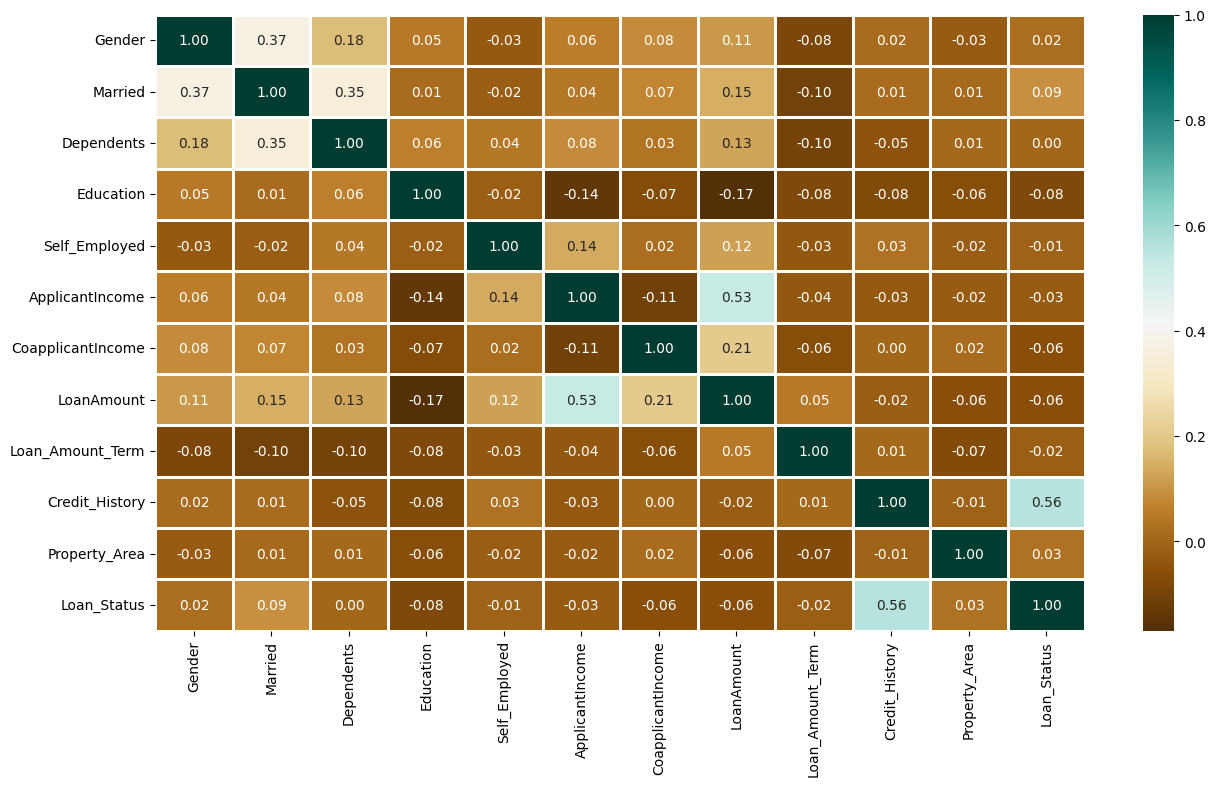

In [187]:
# correlation heatmap
plt.figure(figsize=(15,8))

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

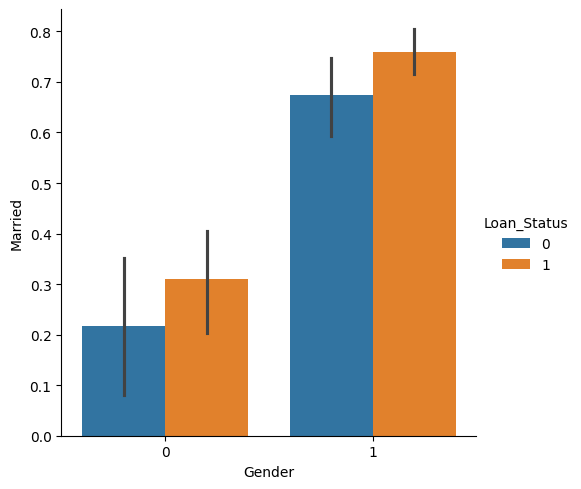

In [188]:
sns.catplot(x="Gender", y="Married",hue="Loan_Status",kind="bar",data=data)

In [189]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean()) 
  
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [190]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into dependent and independent variables
X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3,random_state=7)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((418, 11), (180, 11), (418,), (180,))

In [191]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Model Training and Evaluation

In [192]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

# Initializing the models 
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 300,criterion = 'entropy',random_state =7,max_depth= 5,min_samples_split= 5)
svc = SVC(C= 0.1,gamma="scale",kernel= 'linear')
lc = LogisticRegression()

# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",clf.__class__.__name__,"=",100*metrics.accuracy_score(Y_train,Y_pred))

Accuracy score of  RandomForestClassifier = 81.3397129186603
Accuracy score of  KNeighborsClassifier = 85.16746411483254
Accuracy score of  SVC = 80.14354066985646
Accuracy score of  LogisticRegression = 80.38277511961722


In [193]:
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ",clf.__class__.__name__,"=",100*metrics.accuracy_score(Y_test,Y_pred))

Accuracy score of  RandomForestClassifier = 82.22222222222221
Accuracy score of  KNeighborsClassifier = 76.11111111111111
Accuracy score of  SVC = 82.22222222222221
Accuracy score of  LogisticRegression = 81.66666666666667


---
---

## Hyperparameter tunning
---

In [194]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_rf.fit(X_train, Y_train)

print("RF Best Parameters:", grid_rf.best_params_)
print("RF Best CV Accuracy:", grid_rf.best_score_)

best_rf = grid_rf.best_estimator_


RF Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 300}
RF Best CV Accuracy: 0.8038439472174412


In [195]:
y_pred_rf = best_rf.predict(X_test)

print("Random Forest Test Accuracy:", accuracy_score(Y_test, y_pred_rf))
print(classification_report(Y_test, y_pred_rf))


Random Forest Test Accuracy: 0.8222222222222222
              precision    recall  f1-score   support

           0       0.82      0.39      0.53        46
           1       0.82      0.97      0.89       134

    accuracy                           0.82       180
   macro avg       0.82      0.68      0.71       180
weighted avg       0.82      0.82      0.80       180



In [196]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}

grid_svc = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid_svc,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_svc.fit(X_train, Y_train)

print("SVC Best Parameters:", grid_svc.best_params_)
print("SVC Best CV Accuracy:", grid_svc.best_score_)

best_svc = grid_svc.best_estimator_


SVC Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
SVC Best CV Accuracy: 0.8014343086632243


In [197]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_svc = best_svc.predict(X_test)

print("SVC Test Accuracy:", accuracy_score(Y_test, y_pred_svc))
print(classification_report(Y_test, y_pred_svc))


SVC Test Accuracy: 0.8222222222222222
              precision    recall  f1-score   support

           0       0.82      0.39      0.53        46
           1       0.82      0.97      0.89       134

    accuracy                           0.82       180
   macro avg       0.82      0.68      0.71       180
weighted avg       0.82      0.82      0.80       180



Final Accuracy Comparison
SVC Accuracy: 0.8222222222222222
RF Accuracy: 0.8222222222222222


<function seaborn.categorical.catplot(data=None, *, x=None, y=None, hue=None, row=None, col=None, kind='strip', estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, order=None, hue_order=None, row_order=None, col_order=None, col_wrap=None, height=5, aspect=1, log_scale=None, native_scale=False, formatter=None, orient=None, color=None, palette=None, hue_norm=None, legend='auto', legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, ci=<deprecated>, **kwargs)>

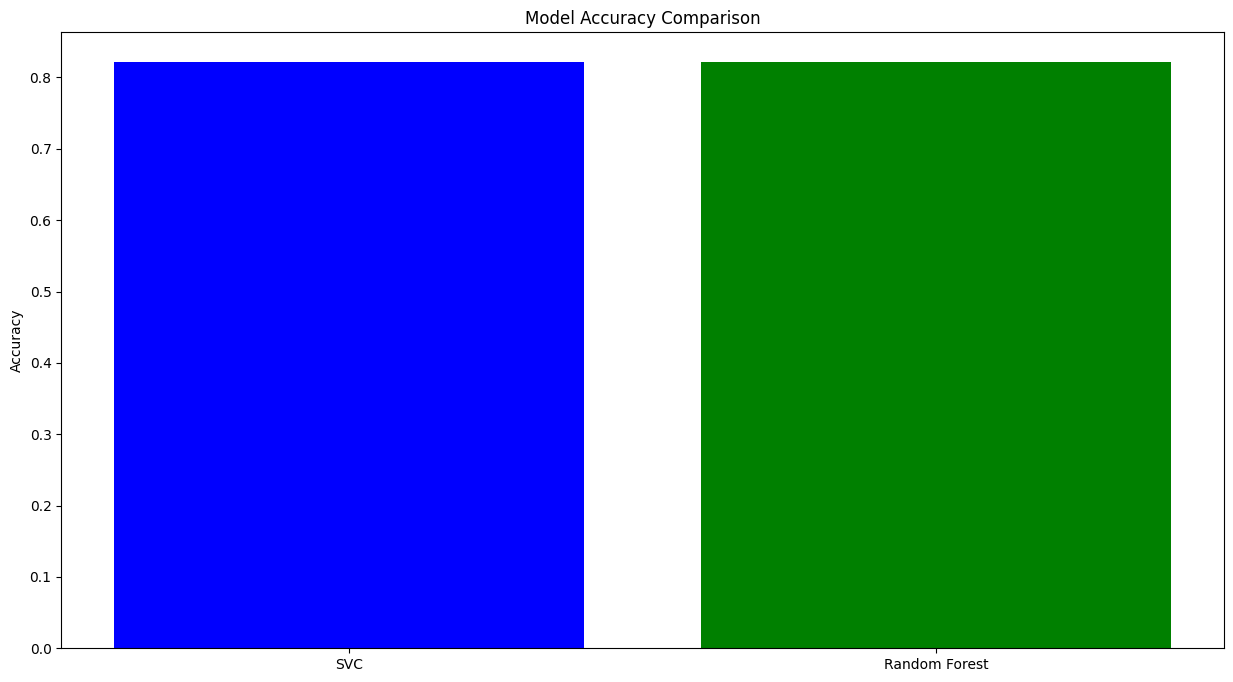

In [199]:
print("Final Accuracy Comparison")
print("SVC Accuracy:", accuracy_score(Y_test, y_pred_svc))
print("RF Accuracy:", accuracy_score(Y_test, y_pred_rf))
plt.figure(figsize=(15,8))
labels = ['SVC', 'Random Forest']
accuracies = [accuracy_score(Y_test, y_pred_svc), accuracy_score(Y_test, y_pred_rf)]
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
sns.catplot
